<a href="https://colab.research.google.com/github/damianoimola/damianoimola.github.io/blob/master/assets/notebooks/fourier-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!wget -O lena.png https://raw.githubusercontent.com/damianoimola/damianoimola.github.io/master/assets/images/lena.png
!wget -O bricks.png https://raw.githubusercontent.com/damianoimola/damianoimola.github.io/master/assets/images/bricks.png

--2025-04-18 22:49:15--  https://raw.githubusercontent.com/damianoimola/damianoimola.github.io/master/assets/images/lena.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176603 (172K) [image/png]
Saving to: ‘lena.png’

lena.png            100%[===================>] 172.46K  --.-KB/s    in 0.1s    

2025-04-18 22:49:15 (1.37 MB/s) - ‘lena.png’ saved [176603/176603]

--2025-04-18 22:49:15--  https://raw.githubusercontent.com/damianoimola/damianoimola.github.io/master/assets/images/bricks.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 O

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [41]:
img1 = Image.open("/content/lena.png").convert("L")
img1_arr = np.array(img1)

img2 = Image.open("/content/bricks.png").convert("L").resize(img1.size)
img2_arr = np.array(img2)

In [61]:
img1_F2 = np.fft.fft2(img1_arr)
img1_F2_shift = np.fft.fftshift(img1_F2)
img1_phase_spectrum = np.angle(img1_F2_shift)
img1_amplitude_spectrum = np.abs(img1_F2_shift)
img1_magnitude_spectrum = np.log(1 + img1_amplitude_spectrum)


img2_F2 = np.fft.fft2(img2_arr)
img2_F2_shift = np.fft.fftshift(img2_F2)
img2_phase_spectrum = np.angle(img2_F2_shift)
img2_amplitude_spectrum = np.abs(img2_F2_shift)
img2_magnitude_spectrum = np.log(1 + img2_amplitude_spectrum)

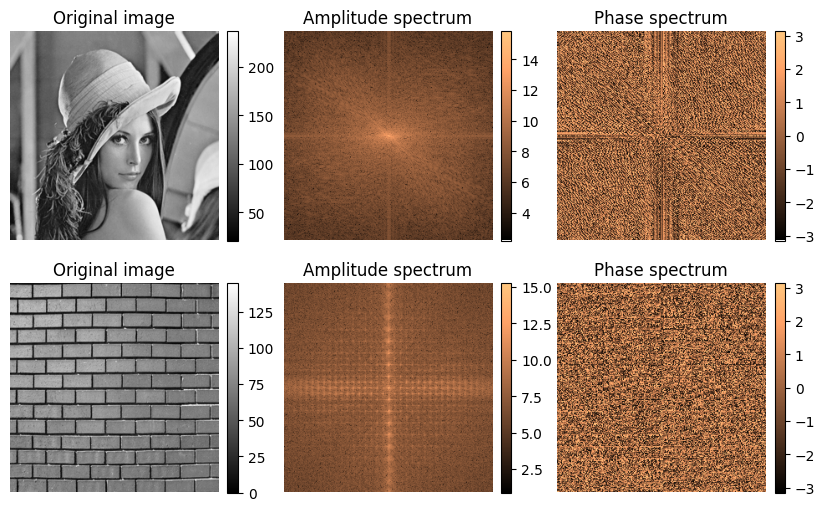

In [59]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
plt.imshow(img1_arr, cmap='gray')
plt.title('Original image')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img1_magnitude_spectrum, cmap='copper')
plt.title('Amplitude spectrum')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img1_phase_spectrum, cmap='copper')
plt.title('Phase spectrum')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img2_arr, cmap='gray')
plt.title('Original image')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img2_magnitude_spectrum, cmap='copper')
plt.title('Amplitude spectrum')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(img2_phase_spectrum, cmap='copper')
plt.title('Phase spectrum')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.show()

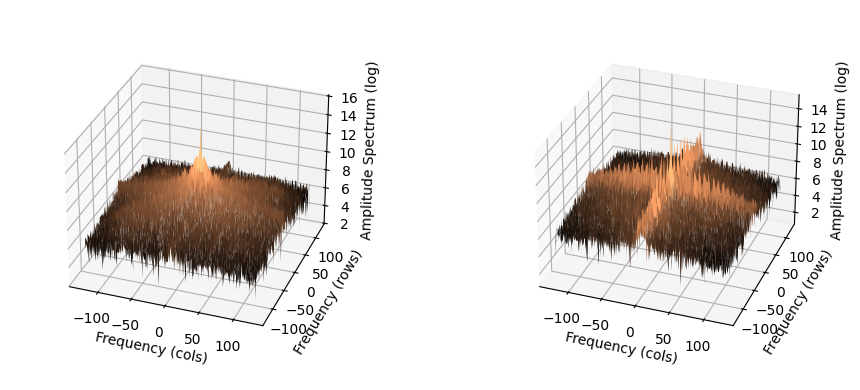

In [60]:
##### 3D ABOUT LENA
# Create a 3D plot
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121, projection='3d')

# Create a meshgrid for x and y coordinates
rows, cols = img1_magnitude_spectrum.shape
x = np.arange(-cols/2, cols/2)
y = np.arange(-rows/2, rows/2)
X, Y = np.meshgrid(x, y)

# Plot the 3D surface
ax.plot_surface(X, Y, img1_magnitude_spectrum, cmap='copper')

# Set labels
ax.set_xlabel('Frequency (cols)')
ax.set_ylabel('Frequency (rows)')
ax.set_zlabel('Amplitude Spectrum (log)')
ax.view_init(elev=30., azim=290.)
ax.set_box_aspect(None, zoom=0.85)





##### 3D ABOUT BRICKS
ax = fig.add_subplot(122, projection='3d')

# Create a meshgrid for x and y coordinates
rows, cols = img2_magnitude_spectrum.shape
x = np.arange(-cols/2, cols/2)
y = np.arange(-rows/2, rows/2)
X, Y = np.meshgrid(x, y)

# Plot the 3D surface
ax.plot_surface(X, Y, img2_magnitude_spectrum, cmap='copper')

# Set labels
ax.set_xlabel('Frequency (cols)')
ax.set_ylabel('Frequency (rows)')
ax.set_zlabel('Amplitude Spectrum (log)')
ax.view_init(elev=30., azim=290.)
ax.set_box_aspect(None, zoom=0.85)


plt.tight_layout()
plt.show()

# Image reconstruction

In [63]:
reconstructed_fourier = img2_amplitude_spectrum * np.exp(1j * img2_phase_spectrum)

In [64]:
reconstructed_image = np.abs(np.fft.ifft2(np.fft.ifftshift(reconstructed_fourier)))

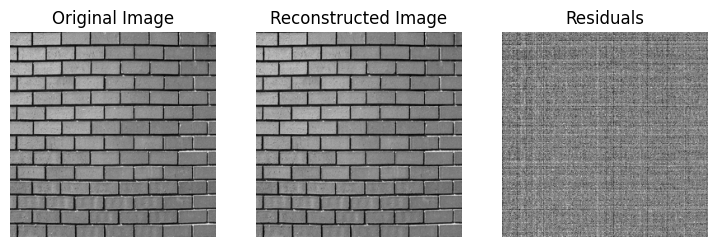

In [67]:
plt.figure(figsize=(9, 3))

plt.subplot(1, 3, 1)
plt.imshow(img2_arr, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img2_arr-reconstructed_image, cmap='gray')
plt.title('Residuals')
plt.axis('off')

plt.show()

# Overlap different phases and amplitudes

In [68]:
reconstructed_fourier = img2_amplitude_spectrum * np.exp(1j * img1_phase_spectrum)

In [69]:
reconstructed_image21 = np.abs(np.fft.ifft2(np.fft.ifftshift(reconstructed_fourier)))

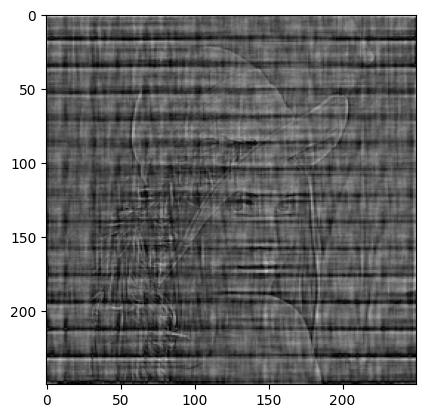

In [70]:
plt.imshow(reconstructed_image21, cmap='gray')

In [71]:
reconstructed_fourier = img1_amplitude_spectrum * np.exp(1j * img2_phase_spectrum)

In [72]:
reconstructed_image12 = np.abs(np.fft.ifft2(np.fft.ifftshift(reconstructed_fourier)))

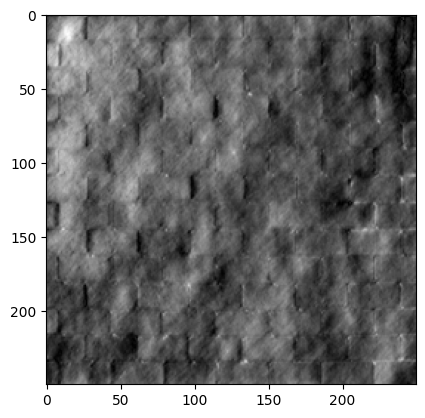

In [73]:
plt.imshow(reconstructed_image12, cmap='gray')

Text(0.5, 1.0, 'phase: bricks, amp.: lena')

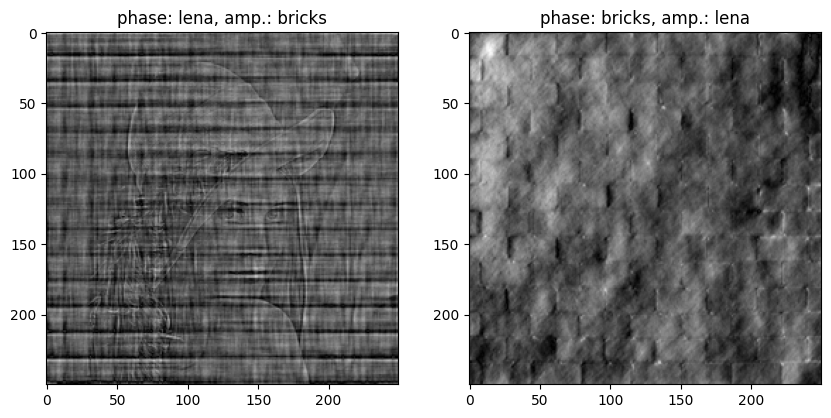

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(10, 15))

ax = axes[0]
ax.imshow(reconstructed_image21, cmap='gray')
ax.set_title("phase: lena, amp.: bricks")

ax = axes[1]
ax.imshow(reconstructed_image12, cmap='gray')
ax.set_title("phase: bricks, amp.: lena")